# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning 

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering 

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores 

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [47]:
df = pd.read_csv("dataset.csv")
for i in df:
    print(i)
    if(i not in ["bmi"  ,"charges"]):
        print(df[i].unique())
    else:
        print(df[i].describe())

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex
['female' 'male']
bmi
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
children
[0 1 3 2 5 4]
smoker
['yes' 'no']
region
['southwest' 'southeast' 'northwest' 'northeast']
charges
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


By looking at each attributes descriptions and distributions, we can see that there is no null/incostistent value.

In [1]:
df = df.replace(["female","no","southwest"],0)
df = df.replace(["male","yes","southeast"],1)
df = df.replace(["northwest"],2)
df = df.replace(["northeast"],3)
df.head(10)
#Encoded the categorical data for consistency

NameError: name 'df' is not defined

In [49]:
scaler = MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)
#Scaled data for my model to give better results

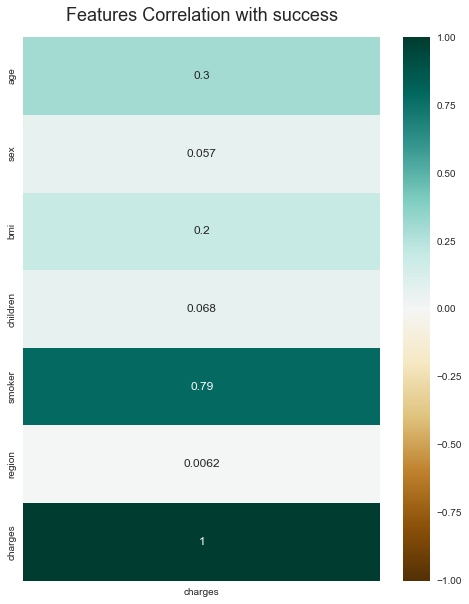

In [50]:
corr = df.corr()

plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(df.corr()[['charges']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with success', fontdict={'fontsize':18}, pad=16)
plt.show()
#Plotted correlation between charges and each attribute

In [51]:
df.drop(columns=["region","sex","children"],inplace=True)

Since region,sex and children attributes has insignificant correlation I decided to drop these collumns 

KMeans(n_clusters=12)

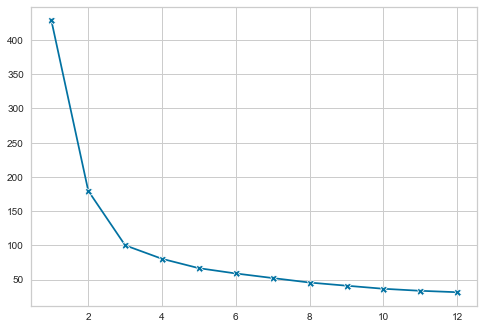

In [52]:
inertias = []
ks = []
for i in range(1,13):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df)
    inertias.append(Kmean.inertia_)
    ks.append(i)
    
sns.lineplot(x = ks, y = inertias,marker="X")
Kmean.fit(df)

#Draw the elbow function to analyze optimal K value for kMeansClustering

By looking at elbow function, we can see that we have 3 clusters

In [53]:
for i in range(2,15):
    kMean = KMeans(n_clusters=i)
    kMeanPredicts  = kMean.fit_predict(df)
    centers = kMean.cluster_centers_

    score = silhouette_score(df,kMeanPredicts,metric="euclidean")
    print("For n_clusters = {}, silhoutte score is {}".format(i,score))

For n_clusters = 2, silhoutte score is 0.6124969241496878
For n_clusters = 3, silhoutte score is 0.49376832989079
For n_clusters = 4, silhoutte score is 0.4615562004698903
For n_clusters = 5, silhoutte score is 0.36294898353543104
For n_clusters = 6, silhoutte score is 0.3400357034100135
For n_clusters = 7, silhoutte score is 0.34144557258658736
For n_clusters = 8, silhoutte score is 0.3325264712929826
For n_clusters = 9, silhoutte score is 0.3390926033664854
For n_clusters = 10, silhoutte score is 0.3310293642947474
For n_clusters = 11, silhoutte score is 0.3332251172109582
For n_clusters = 12, silhoutte score is 0.3282626643511148
For n_clusters = 13, silhoutte score is 0.32735733547223766
For n_clusters = 14, silhoutte score is 0.3357692660334528


Silhoutte score represents how well data is clustered with corresponding cluster number.<br> 
Hence we have the highest Silhoutte score in cluster numbers = 2, we can say that our data should have 2 clusters

In [54]:
conda install -c conda-forge yellowbrick

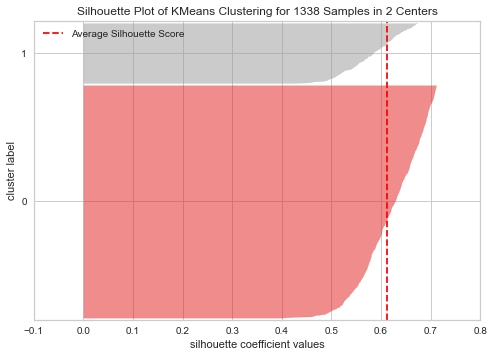

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1338 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer
# Instantiate the clustering model and visualizer
km = KMeans (n_clusters=2)
visualizer = SilhouetteVisualizer(km)

visualizer.fit(df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

Graph shows individiual silhoutte scores for each datapoint for N=2 clusters. <br>
We can say that our data points are well distributed among clusters since we have high sillhoutte score for each data point


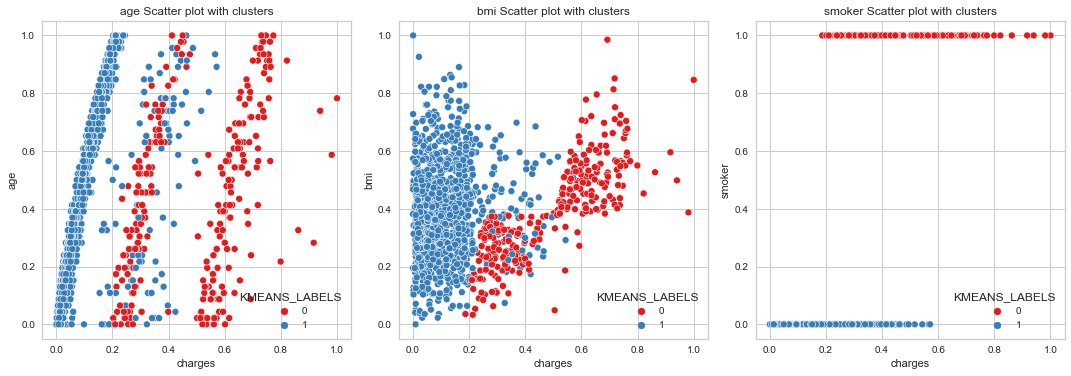

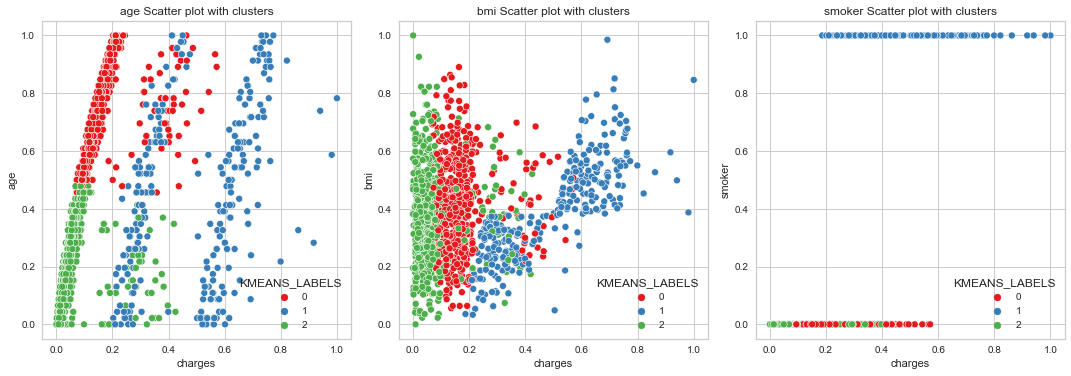

In [56]:
kMean = KMeans(n_clusters=2)
kMeanPredicts  = kMean.fit_predict(df)
df["KMEANS_LABELS"] = kMean.labels_
f= plt.figure(figsize=(20,20))
scatter_cols = ['age','bmi','smoker']

for i,col in enumerate(scatter_cols):
    ax = f.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['charges'],y=df[col],hue=df['KMEANS_LABELS'],palette="Set1")
    ax.set_title(col+" Scatter plot with clusters")
    plt.ylabel(col)
f.tight_layout()
#ScatterPlot for 2 clusters

kMean = KMeans(n_clusters=3)
kMeanPredicts  = kMean.fit_predict(df)
df["KMEANS_LABELS"] = kMean.labels_
f= plt.figure(figsize=(20,20))
scatter_cols = ['age','bmi','smoker']

for i,col in enumerate(scatter_cols):
    ax = f.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['charges'],y=df[col],hue=df['KMEANS_LABELS'],palette="Set1")
    ax.set_title(col+" Scatter plot with clusters")
    plt.ylabel(col)
f.tight_layout()
#Scatter plot for 3 clusters

Graph on the top is the scatter plot of 2 clusters, as silhoutte score suggests <br>Graph on bottom is the scatter plot of 3 clusters, as elbow function suggests 

We can see that we can trust on silhoutte score as it yields much better clusters 

In [57]:
for i in range(2,15):
    aggClust = AgglomerativeClustering(n_clusters=i)
    aggPredicts  = aggClust.fit_predict(df)
    score = silhouette_score(df,aggPredicts,metric="euclidean")
    print("For n_clusters = {}, silhoutte score is {}".format(i,score))



For n_clusters = 2, silhoutte score is 0.6446797711760776
For n_clusters = 3, silhoutte score is 0.7793136600174975
For n_clusters = 4, silhoutte score is 0.7109229425681818
For n_clusters = 5, silhoutte score is 0.7107219156061556
For n_clusters = 6, silhoutte score is 0.5040110986939588
For n_clusters = 7, silhoutte score is 0.2789861069877252
For n_clusters = 8, silhoutte score is 0.2915889873033041
For n_clusters = 9, silhoutte score is 0.27678280765364044
For n_clusters = 10, silhoutte score is 0.2766142290989811
For n_clusters = 11, silhoutte score is 0.2817430268700935
For n_clusters = 12, silhoutte score is 0.2789091969806546
For n_clusters = 13, silhoutte score is 0.2742503080153738
For n_clusters = 14, silhoutte score is 0.28703321259507375


Silhoutte scores for Agglomerative Clustering. <br>As silhoutte score represents how well the clusters are settled in data, we can suggest that we should use n=3 clusters for Agglomerative Clustering

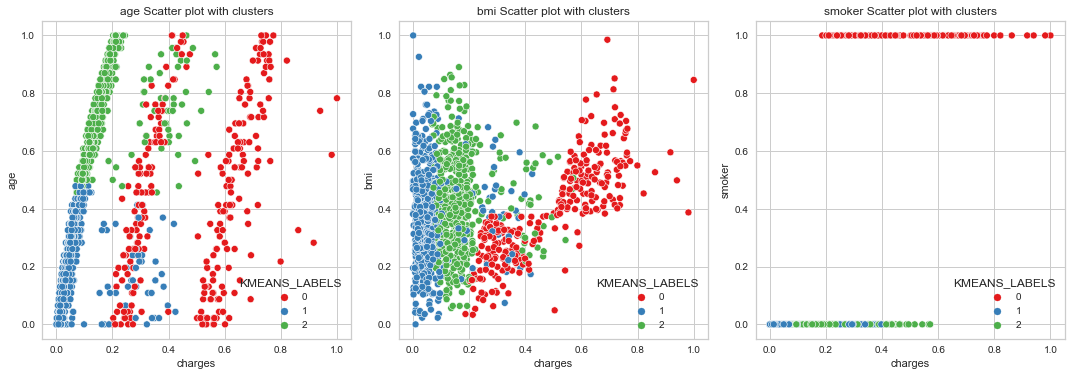

In [ ]:
aggClust = AgglomerativeClustering(3)
aggClust.fit(df)
df["KMEANS_LABELS"] = aggClust.labels_
f= plt.figure(figsize=(20,20))
scatter_cols = ['age','bmi','smoker']

for i,col in enumerate(scatter_cols):
    ax = f.add_subplot(4,4,i+1)
    sns.scatterplot(x=df['charges'],y=df[col],hue=df['KMEANS_LABELS'],palette="Set1")
    ax.set_title(col+" Scatter plot with clusters")
    plt.ylabel(col)
f.tight_layout()

Scatter plot for Agglomerative Clustering clusters for n=3 clusters as Silhoutte Score suggests